# DB SCAN

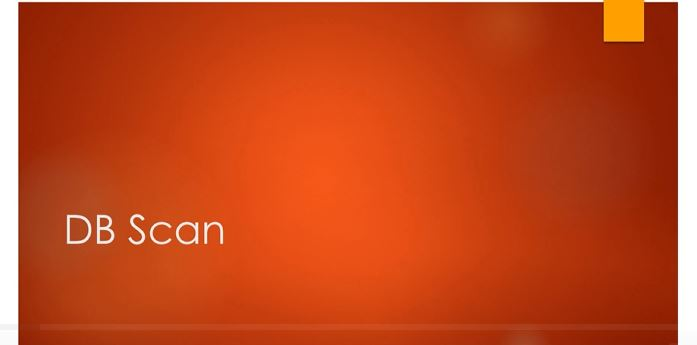

In case of k-means cluster we need value of k and based on that we create spherical cluster 

and we would fix two seperate points based on which the cluster would be created now because of those centroid the cluster which are made are spherical in nature 

But in case of dbscan we won't declare how many how many cluster we want 
DBscan shall autodetect the number of cluster 

for this here we need two parameters 

1. epsilon - neighborhood size 
2. Min points 

It also does not make assumption of spherical cluster 

it can be used for anomly detection 

and it does not get impacted by outliers 

because the cluster will be formed based on the minimum number of points which we will be declaring 
so if there are any outliers then based on these minimum points , we can actually filter  out those outliers and not consider them for those clustere

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

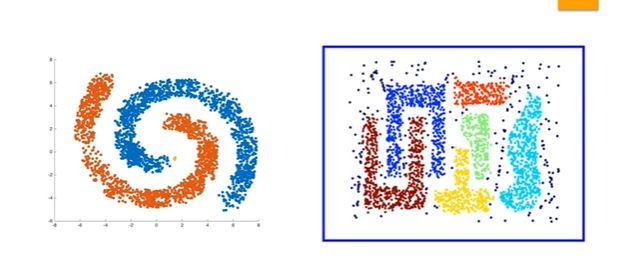

Here we can see that it is able to detect the clusters even though they are not in spherical in nature 
it will detect the cluster in whatever shape they are present 
and it can detect the different pattern which is present in the data and it will not try to create spherical  clusters and it will also isolate the outliers 
so it will kepp the ouliers aside so that we will know that these are actually not a part of data 

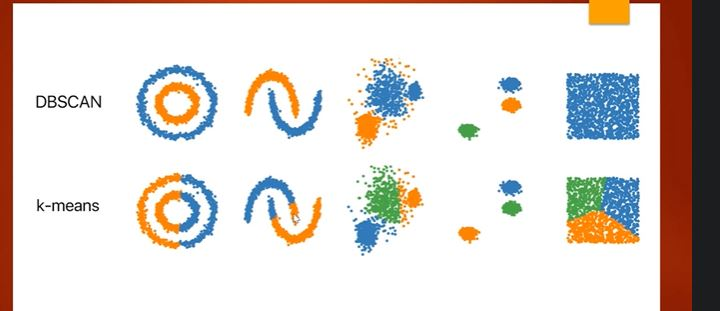

DBsacan is able to create this two ring seperately

while k-means try to create very few clusters 

dbscan do not impose if there are no cluster in the data 

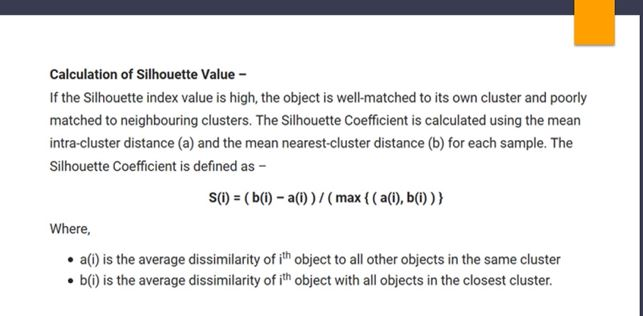

to detec the quality of clusters we have this scoring metric which is silhouette value 

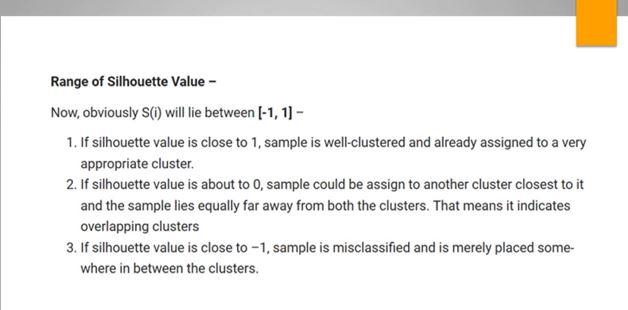

# Code

In [1]:
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
mydata=pd.read_csv("moon_data.csv").iloc[:,1:]
mydata.head()

,X,Y
0,1.045255,0.332214
1,0.801944,-0.411547
2,-0.749356,0.775108
3,0.975674,0.191768
4,-0.512188,0.929997


in this dataset k-means is usually not able to peform very very well 

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


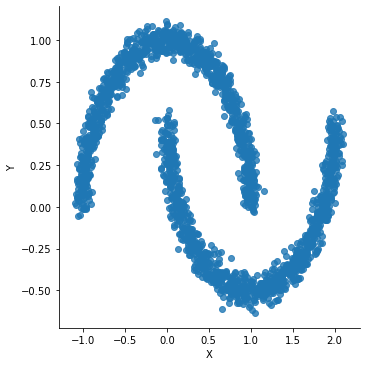

In [3]:
sns.lmplot('X','Y',data=mydata,fit_reg=False) 

Fter plotting we can see that there are two halfmoons present  

so we can see that two type of cluters are present . one is upperhalf and another is lower half 

first we will apply algomeratic clustering

we can see that it is not able to classify properly 

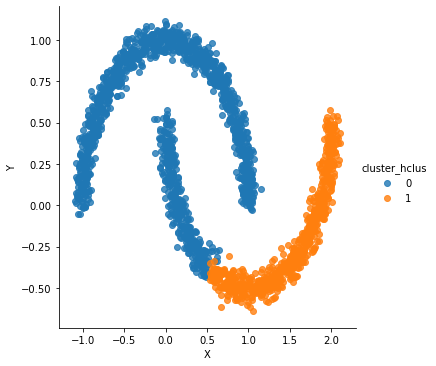

In [5]:
from sklearn.cluster import AgglomerativeClustering
hclus=AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
labels_hclus=hclus.fit_predict(mydata)
mydata['cluster_hclus']=labels_hclus
sns.lmplot(fit_reg=False,x='X',y='Y',data=mydata,hue='cluster_hclus')

Now let's apply k-means on top of it 

we can see that k-means is also not able to cluster it properly 

In [6]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(mydata)
mydata["cluster"]=kmeans.labels_

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


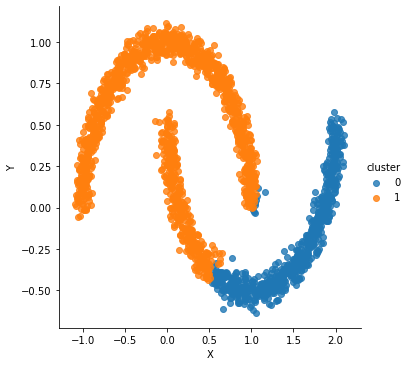

In [7]:
sns.lmplot('X','Y',data=mydata,hue='cluster',fit_reg=False)

k-means everytime will give different clusters 

while aglomeritive cluster will  give same cluster every time 

--------------------------------------------------------------

Now let's try for DBSCAN

In [8]:
from sklearn.cluster import DBSCAN

In [9]:
del mydata['cluster']

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


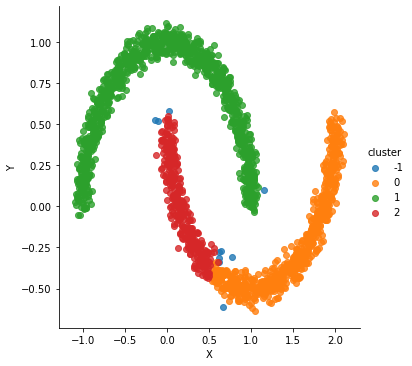

In [10]:
db = DBSCAN(eps=0.1, min_samples=30, metric='euclidean').fit(mydata)
mydata['cluster']=db.labels_
sns.lmplot('X','Y',data=mydata,hue='cluster',fit_reg=False)


 The larger the size of epsilon the faster it will create the neighborhood and the larger the neighbourhood would be 
 
 we are taking min sample 30, sow e are saying that create a cluster 30 if there is minimum 30 points present in the data 

In [11]:
pd.Series(db.labels_).value_counts()

 1    999
 0    648
 2    343
-1     10
dtype: int64

# anamoly detection with dbscan

let's implement the anomly detection

so anomly detection is the practice where we want to isolate the points which are actually outlier for the data  
we wantto capture those datapoint which are not like the other datapoint 

In [12]:
myfile=r'Wholesale customers data.csv'

groc=pd.read_csv(myfile)

groc=groc[["Milk","Grocery"]]

groc_std=pd.DataFrame(scale(groc),columns=list(groc.columns))

So in this dataset we have data about milk and grocery 
so we want to check about milk and grocery how these value are associated and who are the good customer who are bad customer 

and which customer are buying more of the product from us and which customer are buying less product from us 

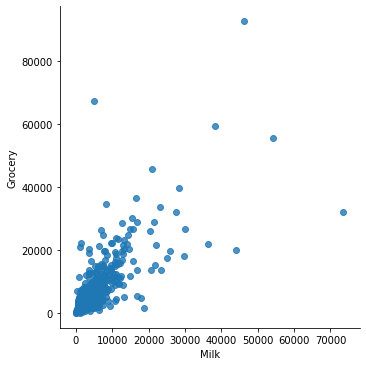

In [13]:
sns.lmplot(x='Milk',y='Grocery',data=groc,fit_reg=False)

We can see that the points which are scattered outside the dark area are outliers 

so all those points are anomly points and they should not be the part of cluster 

In [14]:
r=np.linspace(0.5,5)
for epsilon in r:
    db = DBSCAN(eps=epsilon, min_samples=20, metric='euclidean').fit(groc_std)
    labels = db.labels_
#     n_clust=len(set(labels))-1
    outlier=np.round((labels == -1).sum()/len(labels)*100,2)
#     print('Estimated number of clusters: %d', n_clust)
    print("For epsilon =", epsilon ,", percentage of outliers is: ",outlier)

For epsilon = 0.5 , percentage of outliers is:  9.77
For epsilon = 0.5918367346938775 , percentage of outliers is:  7.95
For epsilon = 0.6836734693877551 , percentage of outliers is:  6.36
For epsilon = 0.7755102040816326 , percentage of outliers is:  5.68
For epsilon = 0.8673469387755102 , percentage of outliers is:  4.55
For epsilon = 0.9591836734693877 , percentage of outliers is:  4.32
For epsilon = 1.0510204081632653 , percentage of outliers is:  3.41
For epsilon = 1.1428571428571428 , percentage of outliers is:  3.41
For epsilon = 1.2346938775510203 , percentage of outliers is:  2.05
For epsilon = 1.3265306122448979 , percentage of outliers is:  2.05
For epsilon = 1.4183673469387754 , percentage of outliers is:  2.05
For epsilon = 1.5102040816326532 , percentage of outliers is:  1.82
For epsilon = 1.6020408163265307 , percentage of outliers is:  1.82
For epsilon = 1.6938775510204083 , percentage of outliers is:  1.36
For epsilon = 1.7857142857142858 , percentage of outliers is:  

Here we are running dbscan and for the different epslon value 

So let's say we want to find out top 1% or top 2% of our customer to whome we want to give particular discount so that they buy more product from us then we can do that from the outliers data 

we can say that these are top 2% who are present at epslon 1.41 

and then we can target for our next campeign or special offers  

In [15]:
db = DBSCAN(eps=0.77, min_samples=20, metric='euclidean').fit(groc_std)
groc['cluster']=db.labels_

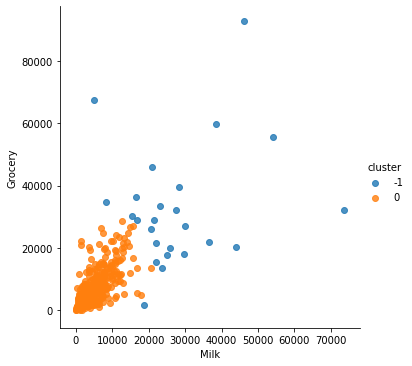

In [16]:
sns.lmplot(x='Milk',y='Grocery',data=groc,fit_reg=False,hue='cluster')

sO this is what we can do using anomly detection

and similarly if there are certain transaction which are actually out of usual transaction which a person make 

for example we are talkig about credit card transaction so there could be certain transaction which are silghtly out of range but we want to find out those transaction which are highly different from the actual data 

so may be we can consider top 5% outlier and then we can target the people and tell them that these are the action which are happening in your credit card so is there any kind of problem you are facing or have you lost your credit card 